预设分割线：y = -5 x + 1


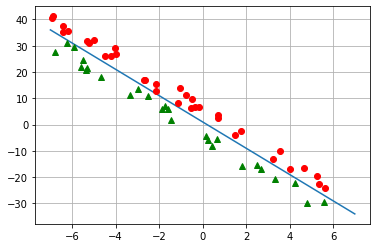

In [148]:
# 生成数据集
import numpy as np
import matplotlib.pyplot as plt

# 训练数据个数
train_N = 60

# y = wx + b
w = np.random.randint(-5, 5)
b = np.random.randint(-5, 5)
print('预设分割线：y =',w,'x +',b)
plt.plot([-7,7],[-7*w+b,7*w+b]) # 绘制直线

# data_x : [[x,y],label]
data_x = []

i = 0
while i < train_N:
    tmp_x = np.random.uniform(-7,7)
    tmp_y = tmp_x * w + b + np.random.uniform(-8,8)
    if abs(tmp_y - (tmp_x * w + b)) <= 1:
        continue
    # 正样本
    if tmp_y > tmp_x * w + b:
        plt.plot(tmp_x,tmp_y,'ro')	# 绘制点
        data_x.append([[tmp_x,tmp_y],1])
    # 负样本
    elif tmp_y < tmp_x * w + b:
        plt.plot(tmp_x,tmp_y,'g^')	# 绘制点
        data_x.append([[tmp_x,tmp_y],0])
    i += 1
    
plt.grid(True)	# 绘制

In [158]:
class Perceptron(object):
    def __init__(self):
        super(Perceptron, self).__init__()
        # 随机初始化
        self.w = [np.random.randint(-5, 5) for i in range(2)]
        self.b = np.random.randint(-5, 5)
        self.learningRate = 0.1

    def response(self, x):
        """计算预测结果：求和，激活"""
        y = sum([i * j for i, j in zip(self.w, x)]) + self.b
        if y >= 0:
            return 1
        else:
            return 0

    def updateWeights(self, x, iterError):
        """
        更新参数权重
        w(t+1) = w(t) + (yi - pi) * xi
        b(t+1) = b(t) + (yi - pi)
        """
        # self.w += self.learningRate * iterError * int(x)
        self.w = [i + self.learningRate * iterError * j for i, j in zip(self.w, x)]
        self.b += self.learningRate * iterError

    def train(self, data):
        """
        训练网络
        """
        lear_flag = True
        iteration = 0

        while lear_flag:
            
            globalError = 0.0
            for data in data_x:
                # 计算预测结果
                r = self.response(data[0])
                if data[1] != r: # 预测错误，更新权重
                    iterError = data[1] - r
                    self.updateWeights(data[0], iterError)
                    globalError += 1
            iteration += 1
            print(f'Epoch {iteration} finished, accuracy is {str((train_N - globalError) / train_N * 100)}%')
            if globalError == 0.0 or iteration >= 100: # 判定学习结束条件
                print('iterations:',iteration)
                lear_flag = False # 停止学习



In [159]:
# 网络训练
p = Perceptron()
p.train(data_x)

Epoch 1 finished, accuracy is 46.666666666666664%
Epoch 2 finished, accuracy is 53.333333333333336%
Epoch 3 finished, accuracy is 55.00000000000001%
Epoch 4 finished, accuracy is 58.333333333333336%
Epoch 5 finished, accuracy is 75.0%
Epoch 6 finished, accuracy is 80.0%
Epoch 7 finished, accuracy is 100.0%
iterations: 7


预设分割线：y = -5 x + 1
预测分割线： 10.016109076953963 * x +  1.94598155830155 * y = 2.500000000000002


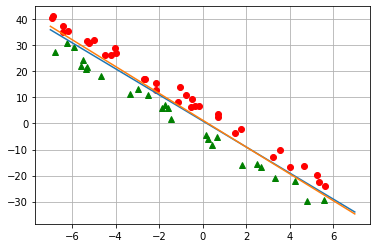

In [151]:
# 可视化
print('预设分割线：y =',w,'x +',b)
print('预测分割线：', p.w[0],'* x + ', p.w[1],'* y =', - p.b)

for data in data_x:
    if data[1] == 0:
        plt.plot(data[0][0],data[0][1],'g^')
    else:
        plt.plot(data[0][0],data[0][1],'ro')

plt.plot([-7,7],[-7*w+b,7*w+b]) # 预设分割线
plt.plot([-7,7],[-(-7.0*p.w[0]+p.b)/p.w[1],-(7.0*p.w[0]+p.b)/p.w[1]]) # 预测分割线
plt.grid(True)

准确率： 100.0%


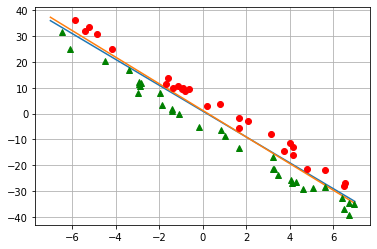

In [153]:
# 测试部分
import numpy as np
import matplotlib.pyplot as plt

# 测试数据个数
test_N = 60
test_data = []

plt.plot([-7,7],[-7*w+b,7*w+b]) # 预设分割线
plt.plot([-7,7],[-(-7.0*p.w[0]+p.b)/p.w[1],-(7.0*p.w[0]+p.b)/p.w[1]]) # 预测分割线

# 生成测试数据
i = 0
while i < test_N:
    tmp_x = np.random.uniform(-7,7)
    tmp_y = tmp_x * w + b + np.random.uniform(-8,8)
    if abs(tmp_y - (tmp_x * w + b)) <= 1:
        continue
    # 正样本
    if tmp_y > tmp_x * w + b:
        # plt.plot(tmp_x,tmp_y,'ro')	# 绘制点
        test_data.append([[tmp_x,tmp_y],1])
    # 负样本
    elif tmp_y < tmp_x * w + b:
        # plt.plot(tmp_x,tmp_y,'g^')	# 绘制点
        test_data.append([[tmp_x,tmp_y],0])
    i += 1

total_error = 0
for data in test_data:
    r = p.response(data[0])
    if r != data[1]:
        total_error += 1
    if r == 1:
        plt.plot(data[0][0],data[0][1],'ro')	# 绘制点
    else:
        plt.plot(data[0][0],data[0][1],'g^')	# 绘制点

print("准确率：",'%s%%'%((1 - total_error/test_N)*100))
# print(len(data_x))
plt.grid(True)	# 绘制